### Things to get from data
1. time tkane for introduction trial ([4,2,3,5,1])
2. time taken for each imitation trial
3. initial states, sequence of comparison, final state for each test trial
4. choices for demo trials
5. initial states, sequence of comparison, final state for each demo trial
6. description

In [1]:
import pandas as pd
import numpy as np
import copy
import glob 
import os 
import csv
import matplotlib.pyplot as plt

In [2]:
path_up='C:/Users/guoqi/GITHUB_QGUO/Gold_Block_Data_Analysis/Data/Pilot/'

In [3]:
# generate a file with prolific id from the demographic file
# for example pid_from_demographic('Cohort2_Pilot1_Demographic.csv','pid_Cohort2_Pilot.csv')
# demo_file:demographic file "xxx.csv"
# pid file "xxx.csv"
def pid_from_demographic(demo_file,pid_file): 
    
    path='C:/Users/guoqi/GITHUB_QGUO/Gold_Block_Data_Analysis/Data/Pilot/'
    
    demographic_data = pd.read_csv(os.path.join(path,demo_file)) 
    pid=demographic_data[demographic_data['Status'] == 'AWAITING REVIEW']
    pid=pid['Participant id'].to_list()
    # print(pid)
    with open(os.path.join(path,pid_file), 'w',newline='') as csvfile:
        # print(os.path.join(path,pid_file))
        # print(csvfile)
        writer = csv.writer(csvfile)
        writer.writerows([pid])
    return pid


In [4]:
#calculates sequence of comparisons, whether they swap and number of least necessary comparisons for an array with a certain order (for example: 6 4 3 1 5 2)
#_f means forward and _b means backward
def imit_seq(array):
    aa=copy.copy(array)
    comp_seq=[]
    swap_or_not=[]
    ii_f=0
    nn=0
    while nn<30:
        
        if aa[ii_f]<aa[ii_f+1]: #correct ofer and keep going forward
            comp_seq.append([ii_f,ii_f+1])
            swap_or_not.append(0)
            nn+=1
            ii_f+=1
        else: #switch when going forward
            comp_seq.append([ii_f,ii_f+1])
            aa[ii_f],aa[ii_f+1]=aa[ii_f+1],aa[ii_f]
            swap_or_not.append(1)
            nn+=1

            ii_b=ii_f
            ii_f+=1

            while nn<30:
                if ii_b==0: #back to position zero
                    break
                if aa[ii_b-1]>aa[ii_b]: #switch and keep going back
                    comp_seq.append([ii_b-1,ii_b])
                    swap_or_not.append(1)
                    aa[ii_b-1],aa[ii_b]=aa[ii_b],aa[ii_b-1]
                    nn+=1
                    ii_b-=1
                if aa[ii_b-1]<aa[ii_b]: #stop going back
                    if ii_b==0:
                        break
                    else:
                        comp_seq.append([ii_b-1,ii_b])
                        swap_or_not.append(0)
                        nn+=1
                        break
        if (aa==np.array(range(1, len(array)+1, 1))).all():
            if np.array([len(array)-2,len(array)-1]) in np.array(comp_seq):
                break
    return array,nn,comp_seq,swap_or_not




# #verify n_nece_compare
# arr_test=np.array([6,4,3,1,5,2]) #13
# arr_test=np.array([1, 2, 3, 4, 8, 7, 6, 5])
# # arr_test=np.array([2,1,4,3,6,5]) #7
# # arr_test=np.array([4,6,3,2,5,1]) #13

# print(imit_seq(arr_test))

In [5]:
# generate a file with prolific id from the demogrphic file
# demographic_data = pd.read_csv("C:/Users/guoqi/GITHUB_QGUO/Gold_Block_Data_Analysis/Data/Pilot/Cohort1_30Participants_Demographic.csv") 
# # pid_data=demographic_data['Participant id']['Status'=='AWAITING REVIEW']
# pid_data=demographic_data[demographic_data['Status'] == 'AWAITING REVIEW']
# pid_data=pid_data['Participant id'].to_list()
# # print(pid_data)
# with open('C:/Users/guoqi/GITHUB_QGUO/Gold_Block_Data_Analysis/Data/Pilot/pid_Cohort1.csv', 'w') as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerows([pid_data])

pid_data=pid_from_demographic('Cohort1_30Participants_Demographic.csv','pid_Cohort1.csv')

In [6]:
# Find Cognition.run datafiles corresponding to prolific ID
cohort1_pid=[str(ii) for ii in pid_data]
print(cohort1_pid)
# cohort1_pid=["6793751badf02fd55a1f0fb9","66a0172986186ec228714d51","66986c9ad97d2e5ff07329c1","65610d3b7a06953204bbbb62","677527596d51edae18442b1e","6595ddebdbc6d36b1ef5462a","6774ed8fea9a49a640664efb","576704bffdff7a0001c12890","679359525d6dac68ab9d189f","6629517257384969d8995d78","5a8cba1a8fe2dc00010643f0","65bfa2967c731d263eb29732","678d97abed191932719e540e","678f1df528b89f7aa06b930e","655e3d32d5562c5520717cfc","6747cb2578e508f43be65a76","6733ba14d32d1b6b8d4b11d8","65e0fc6b883b6a493d50e0a5","671440da17d283b1ef1035be"]
path_cohort1='C:/Users/guoqi/GITHUB_QGUO/Gold_Block_Data_Analysis/Data/Pilot/Cohort1_30Participants_Jan31/'
csv_files = glob.glob(os.path.join(path_cohort1, '*.csv')) 
# print(csv_files)
run_id_cohort1=[]
p_id_cohort1=[]
for csv in csv_files:
    data = pd.read_csv(csv) 
    # print(data['run_id'][0])
    if 'PROLIFIC_PID'not in data:
        # print("none")
        continue
    elif 'phase' not in data:
        # print("none")
        continue
    else:
        data_useful=data[[ 'run_id','PROLIFIC_PID']]
        pid=data_useful['PROLIFIC_PID'][0]
        pid_4=pid[-4:] #last four digit of prolific id
    # print(data_useful['PROLIFIC_PID'])
        if pid in cohort1_pid:
            run_id_cohort1.append(data_useful['run_id'][0])
            p_id_cohort1.append(pid_4)
print(run_id_cohort1)
print(p_id_cohort1)

['6793751badf02fd55a1f0fb9', '66a0172986186ec228714d51', '66986c9ad97d2e5ff07329c1', '65610d3b7a06953204bbbb62', '677527596d51edae18442b1e', '6595ddebdbc6d36b1ef5462a', '6774ed8fea9a49a640664efb', '679359525d6dac68ab9d189f', '576704bffdff7a0001c12890', '6629517257384969d8995d78', '5a8cba1a8fe2dc00010643f0', '674934b4b6bd253249a72d63', '65bfa2967c731d263eb29732', '678d97abed191932719e540e', '678f1df528b89f7aa06b930e', '5e8f53644b34ff22d9b3a1c5', '655e3d32d5562c5520717cfc', '6747cb2578e508f43be65a76', '65e0fc6b883b6a493d50e0a5', '6733ba14d32d1b6b8d4b11d8', '671440da17d283b1ef1035be', '6712e63698e4785e4b2cf0a9', '6712fc1608041fe311ca2221', '63316daa57747115376760da', '63d87d4ba0b86684507f201d', '614e6f4f00a9e94b123316d3', '66e0ff9d08256be084cd8c81', '6427402d1463cb72eca94b3e', '5c6a36214fbf270001311702', '5f4eb642ce413e0ecc88e227']
[30, 31, 32, 35, 36, 37, 42, 43, 44, 51, 52, 54, 55, 56, 57, 59, 60, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76]
['0fb9', '4d51', '29c1', 'bb62', '2b1e

[[30, 0.33230063123235054], [31, 0.11633625514467787], [32, 0.17036049915066243], [35, 0.7257363178538635], [36, 0.06712284154466518], [37, 0.8570336566096233], [42, 0.08178755047774773], [43, 0.1309056974648293], [44, 0.9121280162145547], [51, 0.019457573090183138], [52, 0.3992947581140515], [54, 0.1617997893590027], [55, 1.0], [56, 0.9185890631804092], [57, 0.03852352010597225], [59, 0.005896058860678609], [60, 0.8185758571002164], [62, 0.23498455108164368], [63, 1.0], [64, 0.09645548094357688], [66, 0.8382364014856705], [67, 0.04500205120521715], [68, 0.05165993983169494], [69, 0.017419206004111943], [70, 0.01869198488671813], [71, 0.02196334794343035], [72, 1.0], [73, 0.0745801926771332], [75, 0.5218582736011069], [76, 0.2658326083129622]]
[[55, 1.0], [63, 1.0], [72, 1.0], [56, 0.9185890631804092], [44, 0.9121280162145547], [37, 0.8570336566096233], [66, 0.8382364014856705], [60, 0.8185758571002164], [35, 0.7257363178538635], [75, 0.5218582736011069], [52, 0.3992947581140515], [30,

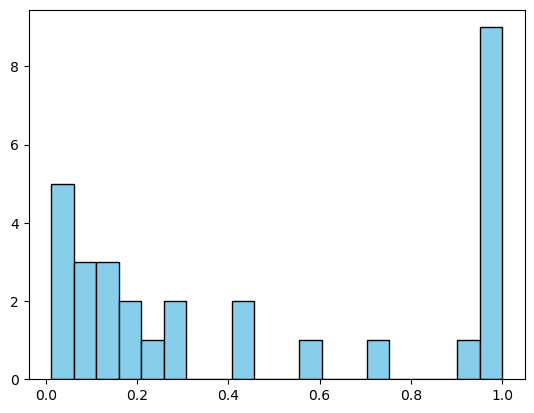

In [7]:
# Calculate score of how well participants learn gnome sort
p_mean_cohort=[]
p_mean_list=[]
p_half_mean_list=[]
for pp in run_id_cohort1:
    data=pd.read_csv(path_cohort1+str(pp)+'.csv')
    data_useful=data[['trial_type','time_elapsed', 'run_id','PROLIFIC_PID','STUDY_ID','stimulus','response','phase','question_order']]
        
    p_gnome_all=[]
    for ii in range(0,10):
        indices_test=data_useful[data_useful['phase'] == "Test "+str(ii)].index.to_numpy()
        fin_order_test=data_useful['phase'][max(indices_test)+1]
        fin_order_test=fin_order_test[13:].split(",")
        fin_order_test=[int(x) for x in fin_order_test]==[1,2,3,4,5] or [int(x) for x in fin_order_test]==[1,2,3,4,5,6,7,8]
    
        ini_order_test=data_useful['phase'][min(indices_test)-1]
        ini_order_test=ini_order_test[15:].split(",")
        ini_order_test=[int(x)+1 for x in ini_order_test]
    
        comp_test = [data['response'][i] for i in indices_test]
        comp_test=[int(x) for x in comp_test]
        comp_test=comp_test[:-1]
        if len(comp_test)%2==1:
            comp_test=comp_test[:-1]
        n_comp_ptcp=int(len(comp_test)/2) #number of comparison made by participants
        comp_test=np.reshape(comp_test, (n_comp_ptcp, 2)).tolist()
        # print(comp_test)
        for row in comp_test:
            if row[0]==row[1]:
                comp_test.remove(row)
        for row in comp_test:
            if row[0]>row[1]:
                cache=row[0]
                row[0]=row[1]
                row[1]=cache
        # print(fin_order_test)
        # print(comp_test)
    
        
        windows_test={}
        for jj in range(len(comp_test),1,-1):
            for kk in range(0,len(comp_test)-jj+1):
                if jj not in windows_test.keys():
                    windows_test[jj]=[comp_test[kk:(kk+jj)]]
                else:
                    windows_test[jj].append(comp_test[kk:(kk+jj)])
        # print(windows_test)
        
    
        array_cache,nn_cache,comp_seq_true,swap_or_not_cache=imit_seq(np.array(ini_order_test))
        # print(comp_seq_true)
        
        windows_true={}
        for jj in range(len(comp_seq_true),1,-1):
            for kk in range(0,len(comp_seq_true)-jj+1):
                if jj not in windows_true.keys():
                    windows_true[jj]=[comp_seq_true[kk:(kk+jj)]]
                else:
                    windows_true[jj].append(comp_seq_true[kk:(kk+jj)])
        # print(windows_true)
    
        common_size=min(len(comp_seq_true),len(comp_test))
        n_comp_true=len(comp_seq_true) #number of comparison for correct gnome
        sim={}
        for mm in range(2,n_comp_true+1):
            sim[mm]=0
            if mm<=common_size:
                win_test=windows_test[mm]
                win_true=windows_true[mm]
                for comp_test in win_test:
                    if comp_test in win_true:
                        sim[mm]+=1
            else:
                sim[mm]=0
        # print(sim)
    
        sum_test=0
        sum_true=0
        for key in sim.keys():
            # sum_true+=key*(common_size-key+1)*(1/2)**(common_size-key)
            sum_true+=key
            if sim[key]>0:
                # sum_test=key
                # sum_test+=key*sim[key]*(1/2)**(common_size-key)
                sum_test+=key*sim[key]/len(windows_true[key])
        if sum_test>sum_true:
            sum_test=sum_true
        # print(sum_test/sum_true)       
    
    
        # for ii in range(len(comp_seq_true),1,-1):
        #     sum_true+=ii*(common_size-ii+1)*(1/2)**(common_size-ii)
    
        p_gnome=sum_test/sum_true
        p_gnome_all.append(p_gnome)
    # p_gnome_all=np.array(p_gnome_all)
    # print(p_gnome_all)
    p_half_criteria=np.quantile(p_gnome_all, 0.5)
    
    p_half=[p for p in p_gnome_all if p>=p_half_criteria]
    p_half_mean=np.average(p_half)
    p_half_mean_list.append(p_half_mean)


    p_mean=np.average(p_gnome_all)
    p_mean_list.append(p_mean)
    p_mean_cohort.append([pp,p_mean])
    
    # print(p_mean)
    # p_gnome_all[p_gnome_all>=p_half]
        # print(sum_true,sum_test)

plt.hist(p_half_mean_list, bins=20, color='skyblue', edgecolor='black')
print(p_mean_cohort)           
p_cohort_sorted=sorted(p_mean_cohort, key=lambda x: x[1],reverse=True)
print(p_cohort_sorted)



# index_crclm=data_useful[data_useful['trial_type'] == "survey-multi-choice"].index.to_numpy()

# crclm=data_useful['response'][index_crclm]
# index_ling=data_useful[data_useful['trial_type'] == "survey-text"].index.to_numpy()
# ling=data_useful['response'][index_ling]
# # crclm=crclm.split(",")
# print(crclm)
# print(ling)


In [8]:
ii=0
# ling_all=[]
ling_all_cohort1=[]
run_id_sorted=[]
for [run_id,score] in p_cohort_sorted:
    
    data=pd.read_csv(path_cohort1+str(run_id)+'.csv')
    data_useful=data[['trial_type','time_elapsed', 'run_id','PROLIFIC_PID','STUDY_ID','stimulus','response','phase','question_order']]
    index_ling=data_useful[data_useful['trial_type'] == "survey-text"].index.to_numpy()
    ling=str(list(data_useful['response'][index_ling]))
    ling=ling[9:-4]
    ling=ling.replace("\\\\n", "<br>") 
    ling=ling.replace("\\", "")
    ling_all_cohort1.append(ling)
    run_id_sorted.append(run_id)

    if ii==0:
        initial_data = {'run_id': [run_id], 
                'Notes': [ling]}
        ling_id_df = pd.DataFrame(initial_data, columns = ['run_id', 'Notes'])
    else:
        ling_id_df.loc[len(ling_id_df)] = [run_id, ling]

    ii+=1
    # if ii>15:
    #     break


# print(ling_id_df)
ling_id_df.to_csv(os.path.join(path_up,'Note_cohort1.csv'))

# # import csv
# with open(os.path.join(path_up,'Note_cohort1.csv'), 'w') as csvfile:
#         writer = csv.writer(csvfile)
#         writer.writerows(ling_id_df)


In [9]:
#every other notes
ling_id_df_half=ling_id_df.iloc[::2, :]
ling_id_df_half=ling_id_df_half.groupby(ling_id_df_half.index // 2).first()
ling_id_df_half_list=ling_id_df_half['Notes'].tolist()
# ling_id_df_half.index/22
print(ling_id_df_half_list)
# ling_id_df_half

["Check if it is moving left to right. They check blocks next to each other starting from the very left. If they don't swap go to the 2nd and 3rd blocks. If they do swap then check if there are any more swaps with previous blocks. Then go back to where you were.", "Step 1: Designate the leftmost object as Object A.<br><br>Step 2: Check if swapping Object A with its right neighbor is valid (based on a predefined rule, such as its weight).<br><br>If invalid, designate the right neighbor as the new Object A and repeat Step 2.<br><br>If valid, swap their positions, designate the swapped neighbor as Object B, note Object A’s position, and proceed to Step 3.<br><br>Step 3: Propagate Object B to the left, following the same logic as Step 2 but with two changes:<br><br>The goal direction is now left.<br><br>If a swap fails, assume Object B is sorted and return to Step 2 and remember Object A's position.", 'Start by comparing the first two blocks. Then progress by comparing the blocks in the 2n

### Analayzing experiments with note rating

In [10]:
import csv
pid_cohort2=pid_from_demographic('Cohort2_Demographic.csv','pid_Cohort2.csv')

# Find Cognition.run datafiles corresponding to prolific ID
cohort2_pid=[str(ii) for ii in pid_cohort2]
print(cohort2_pid)
path_cohort2='C:/Users/guoqi/GITHUB_QGUO/Gold_Block_Data_Analysis/Data/Pilot/Cohort2_30Participants/'
csv_files = glob.glob(os.path.join(path_cohort2, '*.csv')) 
# print(csv_files)
run_id_cohort=[]
p_id_cohort=[]
for csv in csv_files:
    data = pd.read_csv(csv) 
    # print(data['phase'])
    # print(data['run_id'][0])
    if 'PROLIFIC_PID'not in data:
        # print("none")
        continue
    elif 'phase' not in data:
        # print("none")
        continue
    elif 'presented_choices' not in data:
        continue
    else:
        data_useful=data[['run_id','PROLIFIC_PID']]
        pid_cache=data_useful['PROLIFIC_PID'][0]
        pid_4=pid_cache[-4:] #last four digit of prolific id
    # print(data_useful['PROLIFIC_PID'])
        # print(pid)
        if pid_cache in cohort2_pid:
            # print("yes")
            run_id_cohort.append(data_useful['run_id'][0])
            p_id_cohort.append(pid_4)
print(run_id_cohort)
print(p_id_cohort)

['663e3cee91031227e894384a', '659ac6d9e91b332d5e91216c', '60fe08ddc8e72aef56771482', '6442842843aab883445d6708', '667abe08bc794718ca0cf87b', '5f4d3cb5fdda0b2c403fb801', '6685bda9fe63421c0f632414', '661de1d2f9c50b06f796b9cc', '6413c7853eba2b2215197ff4', '62e057323b4ee04dd8f508f6', '5d9264f527fdac00158fd876', '67549868a9ea0e2c285a8f14', '677a8053e35cb9c094676a79', '627f448165ed9095fd43cfd1', '5a79f14a8fe2dc00010593eb', '670db0b5fbb9e80cbee561cc', '674d396ea5a143c1fe1ff5bc', '5d5580165514d80017cd1999', '6762c5c001ce66a8d666441a', '656fc7d36afa7a7199fe7c75', '67007d655b10fbe2d93c3508', '673a8d64bf587131fa065ec5', '664efd1322a0666254a51974', '666dd3d9e53e0ff59d7cc164', '671d44c91d7089c757cf3a7e', '67265982eb0c3fc495c6e33a', '64012a2623351894f2917605', '5aa806e7777df200016088c5', '6444b1e677ebe8b4e2c23abd']
[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 26, 28, 29, 30, 31, 32, 33, 36, 38, 40, 41, 42, 43, 44, 45, 46, 9]
['216c', '1482', '6708', 'f87b', 'b801', '2414', 'b9cc', '7ff4', '08f6'

In [43]:
#Preprocess for Bradley-Terry Model

matrix_rating_total=np.zeros((15,15))
for run_id in run_id_cohort:
    matrix_rating=np.zeros((15,15))
    print("run_id is",run_id)
    # data = pd.read_csv(csv) 
    data=pd.read_csv(path_cohort2+str(run_id)+'.csv')
    data_useful=data[['trial_type','time_elapsed', 'run_id','PROLIFIC_PID','STUDY_ID','stimulus','response','phase','presented_choices']]
    # print(data_useful)

    

    for ii in range(0,14):
        if ii!=5 and ii!=9:
            indices_rating=data_useful[data_useful['phase'] == "Note Comparison"].index.to_numpy()
            # print(indices_rating)
            index_choices=min(indices_rating)+(ii*2)
            index_betterone=index_choices+1
            # print(index_choices)
            # print(index_betterone)
            choices=data_useful['presented_choices'][min(indices_rating)+(ii*2)].split('","')
            # print(len(choices))
            choices = [s.replace('["', '') for s in choices]  
            choices = [s.replace('"]', '') for s in choices]  
            choices = [s.replace('\\', '') for s in choices]  

            indices_two_notes=[]
            for choice in choices:
                # print(choice)
                index_note=ling_id_df_half_list.index(choice)
                # print(index_note)
                # ling_id_df_half.tolist()
                indices_two_notes.append(index_note)
                run_id_note=run_id_sorted[index_note]
                # print(index_note)
                # print("length")
                # print(min(indices_rating)+(ii*2)+1)
                # print(len(data_useful))
            if (min(indices_rating)+(ii*2)+2)>len(data_useful):
                print('Rating Skipped')
            else:
                # print("indices",indices_two_notes)
                better_one=data_useful['response'][min(indices_rating)+(ii*2)+1]
                a=indices_two_notes[0]
                b=indices_two_notes[1]
                if better_one==0:
                    matrix_rating[a][b]+=1
                else:
                    matrix_rating[b][a]+=1
    matrix_rating_total=matrix_rating_total+matrix_rating
print(matrix_rating_total)
# np.matrix(matrix_rating).sum()

run_id is 11
run_id is 12
run_id is 13
run_id is 14
run_id is 15
run_id is 16
run_id is 17
run_id is 18
run_id is 19
run_id is 20
run_id is 22
run_id is 23
run_id is 26
run_id is 28
run_id is 29
run_id is 30
run_id is 31
run_id is 32
run_id is 33
run_id is 36
run_id is 38
run_id is 40
run_id is 41
run_id is 42
run_id is 43
Rating Skipped
run_id is 44
run_id is 45
run_id is 46
run_id is 9
[[ 0.  4.  2.  1.  1.  4.  3.  6.  1.  0.  3.  1.  4.  0.  3.]
 [16.  0.  2.  5.  1.  2.  0.  2.  1.  1.  0.  2.  0.  3.  0.]
 [ 6.  5.  0.  2.  2.  1.  2.  1.  0.  2.  1.  3.  0.  0.  0.]
 [ 6.  1.  4.  0.  9.  3.  2.  2.  4.  0.  2.  0.  1.  2.  1.]
 [ 6.  1.  5.  2.  0.  6.  2.  1.  1.  4.  1.  1.  1.  4.  1.]
 [ 4.  1.  2.  0.  3.  0.  3.  0.  2.  1.  1.  3.  0.  1.  1.]
 [ 1.  0.  1.  3.  0.  1.  0.  2.  1.  2.  2.  1.  1.  2.  2.]
 [ 3.  1.  3.  4.  2.  2.  1.  0.  2.  3.  1.  2.  2.  2.  2.]
 [ 3.  2.  3.  0.  1.  1.  1.  0.  0.  1.  1.  0.  2.  0.  5.]
 [ 3.  0.  0.  1.  0.  0.  0.  0.  1.  0. 

In [44]:
#Validating Bradley-Terry model based on worked example on wikipedia
matrix_example=[[0,2,0,1],[3,0,5,0],[0,3,0,1],[4,0,3,0]]
# matrix_win_lose_df=pd.DataFrame(matrix_win_lose,columns=['A','B','C','D'],index=['A','B','C','D'])
matrix_example_df=pd.DataFrame(matrix_example)

def BT(matrix_win_lose):
    p_list_converge=[]
    p_list=np.ones(len(matrix_win_lose))
    for jj in range(100):
        multi_all=1
        for ii in range(len(p_list)):
            wij=matrix_win_lose.iloc[ii]
            wji=matrix_win_lose[ii]
            pij_nom=p_list/(p_list[ii]+p_list)
            pij_den=1/(p_list[ii]+p_list)
            p_list[ii]=sum(wij*pij_nom)/sum(wji*pij_den)
            multi_all*=p_list[ii]
        geo_mean=multi_all**(1/len(p_list))
        p_list=p_list/geo_mean
        p_list_converge.append(p_list)
        if jj>0 and abs(sum(p_list_converge[jj])-sum(p_list_converge[jj-1]))<0.00001:
            break
    return p_list
# print(p_list_converge)
print(BT(matrix_example_df))
# print(geo_mean)

[0.63983316 1.04331568 0.65981147 2.27037535]


In [45]:
print(BT(pd.DataFrame(matrix_rating_total)))

[0.6214567  1.74906992 0.92456393 1.75471508 1.43005868 1.07654789
 1.0520941  1.44617014 1.06302724 0.54954727 0.9392574  0.56717607
 0.91677382 0.91591667 0.92641819]
